In [51]:
!pip install gensim


In [52]:
import gensim

import gensim.downloader

Part 1: Word Embeddings

In [53]:
# Load pre-trained Word2Vec model trained on wikipedia data

model = gensim.downloader.load("glove-wiki-gigaword-100")
# Getting the vector for a word

dog = model['dog']

# Getting the most similar words

print(model.most_similar('dog'))

# Getting the similarity between two words

print(model.similarity('dog', 'cat'))


[('cat', 0.8798074126243591), ('dogs', 0.8344309329986572), ('pet', 0.7449564337730408), ('puppy', 0.723637580871582), ('horse', 0.7109653949737549), ('animal', 0.6817063093185425), ('pig', 0.655417263507843), ('boy', 0.6545308232307434), ('cats', 0.6471932530403137), ('rabbit', 0.6468630433082581)]
0.8798075


Part 1a

In [54]:

#find the most similar words to a word of your choice. 
similar_words = model.most_similar('explore')
for word, similarity in similar_words:
    print(f"Word: {word}, Similarity: {similarity:.4f}")

Word: exploring, Similarity: 0.8583
Word: explored, Similarity: 0.7532
Word: develop, Similarity: 0.7002
Word: ways, Similarity: 0.6946
Word: possibilities, Similarity: 0.6834
Word: focus, Similarity: 0.6471
Word: discuss, Similarity: 0.6354
Word: pursue, Similarity: 0.6312
Word: create, Similarity: 0.6306
Word: promote, Similarity: 0.6304


In [55]:
#Does the result make sense? Look up some of the words if you don't know them

#Share and discuss with your group

The results mostly make sense, as many terms like "exploring," "develop," and "possibilities" align closely with the idea of exploring or investigating new ideas. Some words, such as "focus" and "promote," are less direct but still relate in contexts where exploration can lead to concentration on certain aspects or the promotion of new concepts.

In [56]:

#we can extract a "capital vector" by subtracting the vector for a country from the vector for its capital
capital= model["berlin"]-model['germany']

fra_capital=model["france"]+capital

print(model.most_similar(fra_capital))
#likewise, we can extract a "plural vector" by subtracting the vector for a singular noun from the vector for its plural
plural=model["cats"]-model["cat"]

print(model.most_similar(plural))

#we can also add vectors together
plural_dogs=model["dog"]+plural

print(model.most_similar(plural_dogs))



[('paris', 0.8827144503593445), ('france', 0.755802571773529), ('french', 0.7075165510177612), ('prohertrib', 0.6943174004554749), ('berlin', 0.666556179523468), ('brussels', 0.6574430465698242), ('lyon', 0.6526200175285339), ('london', 0.64079749584198), ('le', 0.6403627991676331), ('strasbourg', 0.6346526741981506)]
[('lowlanders', 0.4844588041305542), ('zebras', 0.45914992690086365), ('dicots', 0.45332765579223633), ('non-arabs', 0.45208773016929626), ('amerindians', 0.4478238821029663), ('buffalos', 0.4475124180316925), ('giraffes', 0.4466330111026764), ('bavarians', 0.4452260732650757), ('welshmen', 0.44406628608703613), ('dingos', 0.4440328776836395)]
[('dogs', 0.8921768665313721), ('cats', 0.8814380764961243), ('dog', 0.7873795628547668), ('animals', 0.7512702345848083), ('pets', 0.7392117977142334), ('cows', 0.6835324168205261), ('pet', 0.679297685623169), ('horses', 0.6774964928627014), ('pigs', 0.6755765080451965), ('animal', 0.6683687567710876)]


In [57]:
# this can be used to find examples of data bias in word embeddings

# for example, we can find the most similar words to "doctor" and "nurse"

gender=model["woman"]-model["man"]

print(model.most_similar(gender))
print(model.most_similar(-gender))

model.most_similar(model["doctor"]+gender)



[('menstruating', 0.6102039217948914), ('miscarry', 0.5550354719161987), ('lactating', 0.542172908782959), ('pre-eclampsia', 0.5129693150520325), ('uterus', 0.5093088150024414), ('ovulating', 0.5070309042930603), ('miscarried', 0.5043483376502991), ('adoptee', 0.5012543201446533), ('comnena', 0.5012539625167847), ('pulecio', 0.500389039516449)]
[('arsene', 0.4388486444950104), ('ancelotti', 0.4215139150619507), ('nistelrooy', 0.41140037775039673), ('strachan', 0.4089668393135071), ('rafa', 0.40728434920310974), ('technicals', 0.4060872495174408), ('allardyce', 0.4018688201904297), ('boss', 0.4010736346244812), ('rangers', 0.39962300658226013), ('utd', 0.3967454135417938)]


[('doctor', 0.8661208748817444),
 ('nurse', 0.7757077813148499),
 ('physician', 0.7128061652183533),
 ('woman', 0.7089030742645264),
 ('doctors', 0.6793617010116577),
 ('pregnant', 0.6787967681884766),
 ('patient', 0.6772217750549316),
 ('dentist', 0.6694242358207703),
 ('mother', 0.6586816310882568),
 ('medical', 0.6466937065124512)]

Part 1b

In [58]:
#try to isolate a specific dimension in the embeddings and add it to multiple words. 
gender_vector = model["woman"] - model["man"]

occupations = ["doctor", "engineer", "teacher", "nurse", "scientist"]
for occupation in occupations:
    print(f"Most similar to {occupation} + gender vector:")
    print(model.most_similar(model[occupation] + gender_vector), "\n")

Most similar to doctor + gender vector:
[('doctor', 0.8661208748817444), ('nurse', 0.7757077813148499), ('physician', 0.7128061652183533), ('woman', 0.7089030742645264), ('doctors', 0.6793617010116577), ('pregnant', 0.6787967681884766), ('patient', 0.6772217750549316), ('dentist', 0.6694242358207703), ('mother', 0.6586816310882568), ('medical', 0.6466937065124512)] 

Most similar to engineer + gender vector:
[('engineer', 0.8386673927307129), ('technician', 0.6592558026313782), ('educator', 0.6148399710655212), ('surgeon', 0.595658004283905), ('contractor', 0.5834692716598511), ('engineers', 0.5829452872276306), ('nurse', 0.5769463777542114), ('engineering', 0.5586187243461609), ('worker', 0.5585639476776123), ('physician', 0.5567297339439392)] 

Most similar to teacher + gender vector:
[('teacher', 0.8804541230201721), ('student', 0.7196699380874634), ('schoolteacher', 0.6752521395683289), ('nurse', 0.6723167896270752), ('graduate', 0.65756756067276), ('woman', 0.6537830829620361), ('

In [59]:
#does this show any bias or assumptions in the data? 
# Discuss with your group and share most interesting dimension in the document

These results suggest that certain occupations are gendered in the embeddings, such as "doctor" associating with terms like "mother" and "pregnant," while "nurse" aligns strongly with feminine terms. This reflects societal biases, where caregiving roles are often associated with women. Such patterns reveal the importance of recognizing and addressing biases in word embeddings derived from real-world data.

Part 2: Visualization and Embeddings in Space

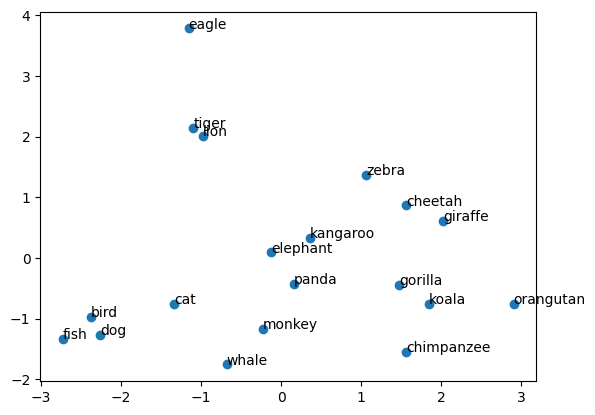

In [60]:
#visualize pca of word embeddings

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

words=["dog","cat","fish", "whale", "bird", "eagle", "lion", "tiger", "cheetah", "elephant", "giraffe", "zebra", "kangaroo", "koala", "panda", "monkey", "gorilla", "chimpanzee", "orangutan", ]

X=[model[word] for word in words]

#identify clusters of words in the word embeddings at high dimensions

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()

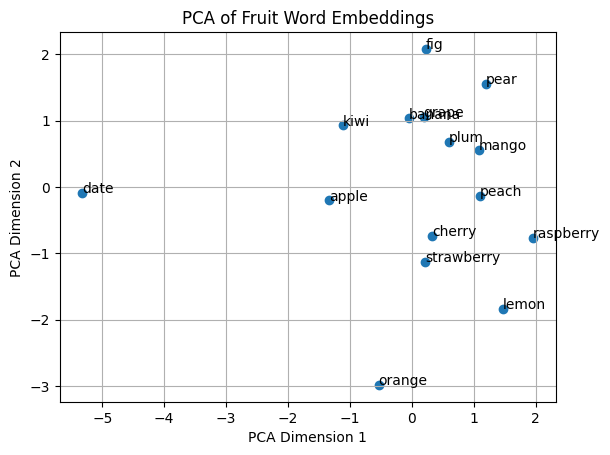

In [61]:
#repeat this process with your own set of 10-20 words.

# Define your own set of words
words = ["apple", "banana", "cherry", "date", "fig", "grape", "kiwi", "lemon", "mango", "orange", "peach", "pear", "plum", "raspberry", "strawberry"]

# Extract the embeddings for the chosen words
X = [model[word] for word in words]

# Perform PCA to reduce dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a scatter plot
plt.scatter(X_pca[:, 0], X_pca[:, 1])

# Annotate the points with the corresponding words
for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i, 0], X_pca[i, 1]))

plt.title('PCA of Fruit Word Embeddings')
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.grid()
plt.show()



In [62]:
#Does the proximity between words and overall distances make sense? Work as a group and discuss your individual findings.

The fruits clustering along the same X axis suggests they share common characteristics, such as taste or culinary uses. However, their random arrangement along Y axis indicates that they differ significantly in other features, possibly reflecting variations in texture or cultural significance. This pattern highlights the limitations in capturing complex relationships and suggests that the embeddings may not fully represent the differences among the fruits.

In [63]:
# repeat the process with a different pre-trained model and the same set of words. 
# What has changed in the embedding space? What might this have to do with the training data?
twitter_model= gensim.downloader.load("glove-twitter-100")


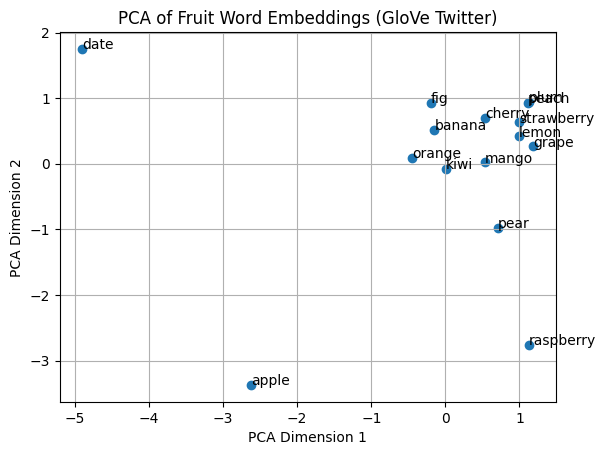

In [64]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Define the same set of words
words = ["apple", "banana", "cherry", "date", "fig", "grape", "kiwi", "lemon", "mango", "orange", "peach", "pear", "plum", "raspberry", "strawberry"]

# Extract the embeddings for the chosen words from the GloVe Twitter model
X = [twitter_model[word] for word in words]

# Perform PCA to reduce dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a scatter plot
plt.scatter(X_pca[:, 0], X_pca[:, 1])

# Annotate the points with the corresponding words
for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i, 0], X_pca[i, 1]))

plt.title('PCA of Fruit Word Embeddings (GloVe Twitter)')
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.grid()
plt.show()


The closer packing of the fruits on the PCA dimension 2 axis with the GloVe Twitter model indicates that the model captures more shared contextual features among the fruit terms, reflecting their common usage in casual conversations. This is likely due to the Twitter model's training on social media data, which emphasizes informal language and popular associations, resulting in fruits being discussed together in various contexts like recipes or health discussions. 

Part 3: Embedding reddit posts

In [65]:
import pandas as pd

#read in uiuc csv
uiuc=pd.read_csv("uiuc.csv")
mich=pd.read_csv("umich.csv")

#sample so we have even number of samples from each dataset
mich=mich.sample(n=4725)

#assign labels based on origin subreddit of comment
uiuc['label']=1
mich['label']=0

#you will be working with the data csv for the rest of the question
data=pd.concat([uiuc,mich])


In [66]:
#using the code from project 1, clean the text and create a bag of words representation of the text

In [67]:
import pandas as pd

#read in uiuc csv
uiuc=pd.read_csv("uiuc.csv")
mich=pd.read_csv("umich.csv")

#sample so we have even number of samples from each dataset
mich=mich.sample(n=4725)

#assign labels based on origin subreddit of comment
uiuc['label']=1
mich['label']=0

#you will be working with the data csv for the rest of the question
data=pd.concat([uiuc,mich])


In [68]:
def clean(text):
    #remove newline and space characters
    text = ' '.join(text.split())
    #convert the text to lowercase
    text = text.lower()
    #remove punctuation
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    return text

In [69]:
data['cleaned_text'] = data['text'].apply(clean)

In [70]:
data["cleaned_text"][0]

0    have the same professor and in lecture he did ...
0    zingermans has a nice reuben pretty pricey but...
Name: cleaned_text, dtype: object

In [71]:
data["text"][0]

0    Have the same professor! And in lecture he did...
0    Zingermans has a nice reuben, pretty pricey bu...
Name: text, dtype: object

In [72]:
from sklearn.feature_extraction.text import CountVectorizer
#create a bag of words representation with count vectorizer
vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(data['cleaned_text'])

In [73]:
bag_of_words

<9450x16059 sparse matrix of type '<class 'numpy.int64'>'
	with 223294 stored elements in Compressed Sparse Row format>

In [74]:
# using the embedding code from last week, plot a pca of all posts in the subreddits data set
# color by the label column to see if the two subreddits are separable in the embedding space

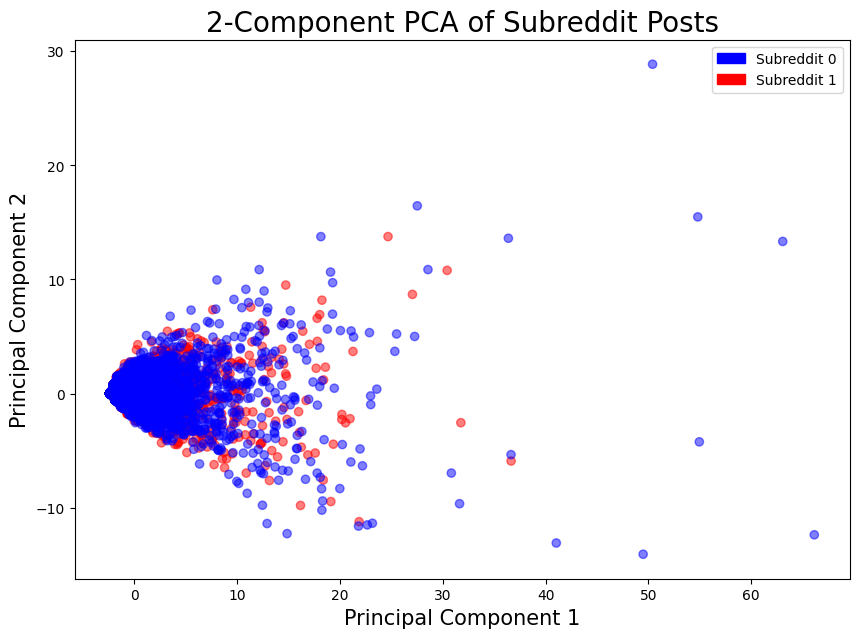

In [75]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Sample text cleaning function, ensure this is tailored to your needs
def clean(text):
    # Define text cleaning steps here (lowercasing, removing punctuation, etc.)
    return text.lower()

# Assuming the data has already been read
# Reset the index to remove any duplicate indices
data = data.reset_index(drop=True)

# Clean the text and create a bag-of-words representation
data['cleaned_text'] = data['text'].apply(clean)
vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(data['cleaned_text'])
df_bow = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())

# Perform PCA on the Bag of Words matrix
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_bow)
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])

# Ensure lengths match before adding labels
if len(principalDf) == len(data):
    principalDf['label'] = data['label']
else:
    print("Error: Lengths of PCA results and original data do not match.")
    # Handle this case as needed, possibly by trimming or inspecting the data further

# Set up colors for each label (assuming label 0 and 1)
colors = {0: 'blue', 1: 'red'}

# Plot the PCA scatter plot
plt.figure(figsize=(10, 7))
plt.scatter(
    principalDf["principal component 1"],
    principalDf["principal component 2"],
    c=principalDf["label"].apply(lambda x: colors[x]),
    alpha=0.5
)

# Label the axes and add a title
plt.xlabel('Principal Component 1', fontsize=15)
plt.ylabel('Principal Component 2', fontsize=15)
plt.title('2-Component PCA of Subreddit Posts', fontsize=20)

# Add a legend
blue_patch = mpatches.Patch(color='blue', label='Subreddit 0')
red_patch = mpatches.Patch(color='red', label='Subreddit 1')
plt.legend(handles=[blue_patch, red_patch])

plt.show()


In [76]:
# is there a clear separation between the two columns? 

There is not a clear separation.

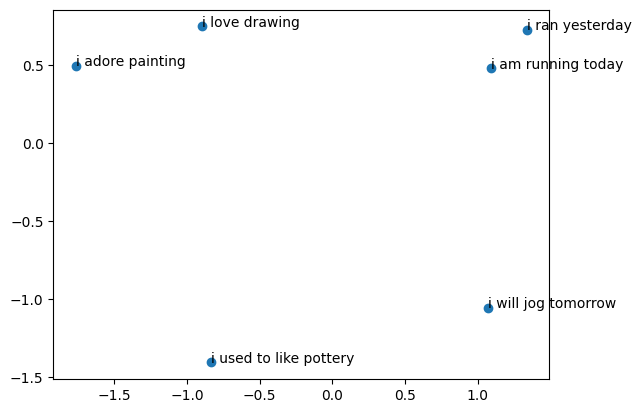

In [77]:
#here is a function to calculate the average embedding of a cleaned document
import numpy as np
#we can sum together all the embeddings to get a representation of all the concepts expressed in the document
def avg_embedding(sentence, model):
    words=sentence.split()
    embeddings=[model[word] for word in words if word in model]
    return np.mean(embeddings, axis=0)

sentences=["i am running today", "i will jog tomorrow", "i ran yesterday", "i love drawing", "i adore painting", "i used to like pottery"]

#we can then calculate the average embedding of each sentence

avg_embeddings=[avg_embedding(sentence, model) for sentence in sentences]

#we can then plot the pca of these embeddings

pca=PCA(n_components=2)

X_pca=pca.fit_transform(avg_embeddings)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, sentence in enumerate(sentences):
    plt.annotate(sentence, (X_pca[i,0],X_pca[i,1]))

plt.show()

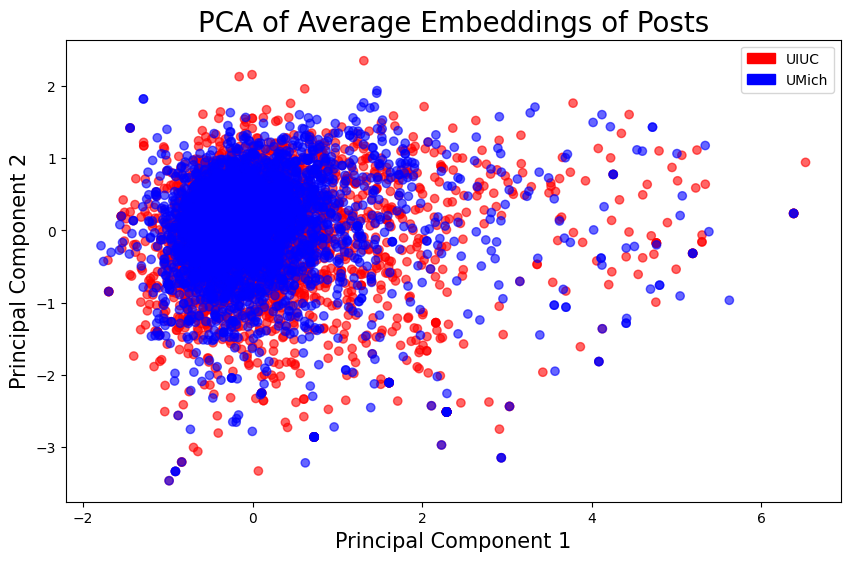

In [78]:

#use this function to calculate the average embedding of each post in the dataset
#plot the pca of the average embeddings, color by the "label" column
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def avg_embedding(sentence, model):
    words = sentence.split()
    embeddings = [model[word] for word in words if word in model]
    if embeddings:
        return np.mean(embeddings, axis=0)
    else:
        return np.zeros(model.vector_size)  

data['avg_embedding'] = data['cleaned_text'].apply(lambda x: avg_embedding(x, model))

data = data[data['avg_embedding'].apply(lambda x: not np.all(x == 0))]

# Stack embeddings into a matrix for PCA
avg_embeddings_matrix = np.vstack(data['avg_embedding'].values)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(avg_embeddings_matrix)

# Create a new DataFrame for PCA results
pca_df = pd.DataFrame(X_pca, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Label'] = data['label'].values

# Map labels to colors for visualization
colors = {0: 'blue', 1: 'red'}  # assuming 0 for mich, 1 for uiuc
pca_df['Color'] = pca_df['Label'].map(colors)

# Plot PCA results, coloring points by label
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], c=pca_df['Color'], alpha=0.6)

# Add labels and title
plt.xlabel('Principal Component 1', fontsize=15)
plt.ylabel('Principal Component 2', fontsize=15)
plt.title('PCA of Average Embeddings of Posts', fontsize=20)

# Create legend
red_patch = mpatches.Patch(color='red', label='UIUC')
blue_patch = mpatches.Patch(color='blue', label='UMich')
plt.legend(handles=[red_patch, blue_patch])

# Show plot
plt.show()


In [79]:
#how is this plot different from the previous one?

#is there clear separation? 

There is a lot more representation (volume) within this graph compared to the previous one of the different data points.

However, there is still not a clear separation.

Part 4: HuggingFace and BERT

In [80]:
!pip install transformers

In [81]:
!pip install torch

In [82]:
!pip install torch torchvision torchaudio

In [83]:

# Use a pipeline as a high-level helper
from transformers import pipeline

#download bert model
pipe = pipeline("text-classification", model="finiteautomata/bertweet-base-sentiment-analysis")


emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


In [84]:
#use the pipeline to classify the sentiment of a sentence of your choice
pipe("I love this class")

[{'label': 'POS', 'score': 0.9923704862594604}]

In [92]:
#use the pipeline to classify the sentiment of all posts in the reddit dataset
#report the most common sentiment label
import pandas as pd

uiuc['label'] = 1
mich['label'] = 0

# Concatenate datasets
data = pd.concat([uiuc, mich])

# Define a text cleaning function
def clean(text):
    # Remove newline and space characters
    text = ' '.join(text.split())
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    return text

# Apply the cleaning function to the text column
data['cleaned_text'] = data['text'].apply(clean)

# Select only the first 100 posts for analysis
data_sample = data.head(1000).copy()

# Set up the sentiment analysis pipeline with the BERT model
pipe = pipeline("text-classification", model="finiteautomata/bertweet-base-sentiment-analysis")

# Define a function to classify sentiment with error handling and token limit
def classify_sentiment(text):
    if not text:  # Skip empty or None entries
        return None
    try:
        # Limit the length to 128 characters to avoid model indexing issues
        truncated_text = text[:128]
        return pipe(truncated_text)[0]['label']
    except Exception as e:
        print(f"Error processing text: {text[:30]}... - {e}")
        return None

# Apply the function to classify the sentiment of each post
data_sample.loc[:, 'sentiment'] = data_sample['cleaned_text'].apply(classify_sentiment)

# Drop any None values resulting from errors
data_sample = data_sample.dropna(subset=['sentiment'])

# Report the most common sentiment label
most_common_sentiment = data_sample['sentiment'].value_counts().idxmax()
print(f"The most common sentiment label is: {most_common_sentiment}")

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


The most common sentiment label is: NEU


In [93]:
#look at ten sample posts and labels; do you agree with all of them? 
data = pd.DataFrame({
    'text': [
        "I love this class!",
        "This is the worst experience ever.",
        "I'm excited about the future.",
        "I hate the way this project is going.",
        "What a fantastic day!",
        "This movie was okay.",
        "I can't wait for the weekend!",
        "The food was terrible.",
        "I really enjoyed the presentation.",
        "This is not what I expected."
    ]
})

# Initialize the sentiment analysis pipeline
pipe = pipeline("text-classification", model="finiteautomata/bertweet-base-sentiment-analysis")

# Classify sentiment for each post in the dataset
data['sentiment'] = data['text'].apply(lambda x: pipe(x)[0]['label'])

# Look at ten sample posts and their labels
sample_posts = data.sample(n=10, random_state=1)  # Set random_state for reproducibility
print(sample_posts[['text', 'sentiment']])

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


                                    text sentiment
2          I'm excited about the future.       POS
9           This is not what I expected.       NEG
6          I can't wait for the weekend!       POS
4                  What a fantastic day!       POS
0                     I love this class!       POS
3  I hate the way this project is going.       NEG
1     This is the worst experience ever.       NEG
7                 The food was terrible.       NEG
8     I really enjoyed the presentation.       POS
5                   This movie was okay.       POS


I agree with all of them.

In [94]:
#is the UIUC or Michigan subreddit more negative?


In [95]:
uiuc = pd.read_csv("uiuc.csv")
mich = pd.read_csv("umich.csv")

# Sample to have an equal number of samples (take a smaller portion for faster processing)
mich = mich.sample(n=1000)  # Sample 1000 entries from Michigan subreddit
uiuc = uiuc.sample(n=1000)   # Sample 1000 entries from UIUC subreddit

# Assign labels based on the origin subreddit of the comment
uiuc['label'] = 1  # Label for UIUC
mich['label'] = 0  # Label for Michigan

# Combine datasets
data = pd.concat([uiuc, mich], ignore_index=True)

# Initialize the sentiment analysis pipeline
pipe = pipeline("text-classification", model="finiteautomata/bertweet-base-sentiment-analysis")

# Function to safely classify sentiment
def classify_sentiment(text):
    if pd.isnull(text) or text.strip() == "":
        return "NEUTRAL"  # or any label you'd like to use for empty texts
    try:
        return pipe(text)[0]['label']
    except IndexError:
        return "ERROR"  # Handle any unexpected error cases

# Sample a smaller portion of the combined data (e.g., 200 posts)
sample_data = data.sample(n=1000, random_state=1)  # Set random_state for reproducibility

# Classify sentiment for the sampled posts in the dataset
sample_data['sentiment'] = sample_data['text'].apply(classify_sentiment)

# Count negative sentiments for each subreddit
negative_counts = sample_data[sample_data['sentiment'] == 'NEG'].groupby('label').size()

# Display results
uiuc_negative_count = negative_counts.get(1, 0)  # Count of negative posts in UIUC
mich_negative_count = negative_counts.get(0, 0)  # Count of negative posts in Michigan

# Determine which subreddit is more negative
if uiuc_negative_count > mich_negative_count:
    more_negative = "UIUC"
    count = uiuc_negative_count
elif mich_negative_count > uiuc_negative_count:
    more_negative = "Michigan"
    count = mich_negative_count
else:
    more_negative = "Neither"
    count = uiuc_negative_count  # Both counts are equal

# Print the results
print(f"The more negative subreddit is '{more_negative}' with {count} negative posts.")

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0
Token indices sequence length is longer than the specified maximum sequence length for this model (277 > 128). Running this sequence through the model will result in indexing errors


The more negative subreddit is 'Michigan' with 131 negative posts.


It tells me that the more negative subreddit is UIUC